1. Importing libraries

In [283]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, os 

Setting display options

In [284]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

2. Reading the data

In [285]:
PROJECT_DIR  = "/Users/abhisheksaurav/Desktop/real_estate_project/"
DATA_DIR = "Data Collection/Data/City/chandigarh/cleaned_data"

In [286]:
def get_data(name):
    file_name = "{}.csv".format(name)
    file_path = os.path.join(PROJECT_DIR, DATA_DIR, file_name)
    return pd.read_csv(file_path)

In [287]:
data = get_data("gurgaon_properties_outlier_treated")

In [288]:
data.sample(3)

,property type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxary_score,area_bedroom_ratio
3160,flat,dlf regal gardens,sector 90,1.20,6838.0,1755.0,Super Built up area 1755(163.04 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.),3.0,3,3+,15.0,south-west,Relatively New,1755.0,NaN,1400.0,0,0,0,0,0,0,118,585.0
1575,flat,hcbs sports ville,sector 163,0.32,5517.0,580.0,Carpet area: 580 (53.88 sq.m.),2.0,2,1,7.0,na,New Property,NaN,NaN,580.0,0,0,0,0,0,0,37,290.0
121,house,independent,sector 3,0.37,7923.0,467.0,Built Up area: 480 (44.59 sq.m.),1.0,1,1,1.0,NaN,Relatively New,NaN,480.0,NaN,0,0,0,0,0,0,0,467.0


In [289]:
# checking for null values 

data.isnull().sum()

property type             0
society                   1
sector                    0
price                     0
price_per_sq_ft           0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                  2
facing                  255
agePossession             0
super_built_up_area    1874
built_up_area          2093
carpet_area            1842
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxary_score              0
area_bedroom_ratio        0
dtype: int64

In [290]:
data[(data.super_built_up_area.isnull()) & (data.built_up_area.isnull()) & (data.carpet_area.isnull())].shape

(0, 24)

- There aren't ary records for which the super built up area, built up area and carpet area have null values. 
- We will use super built up area and carpet area to fill the missing values in the built up area. 

In [291]:
data.facing.value_counts()

facing
na            871
north-east    503
east          488
north         298
south         203
west          183
north-west    160
East          155
North-East    145
south-east    144
south-west    133
North          93
West           60
South-East     35
North-West     35
South          27
South-West     20
Name: count, dtype: int64

built_up_area

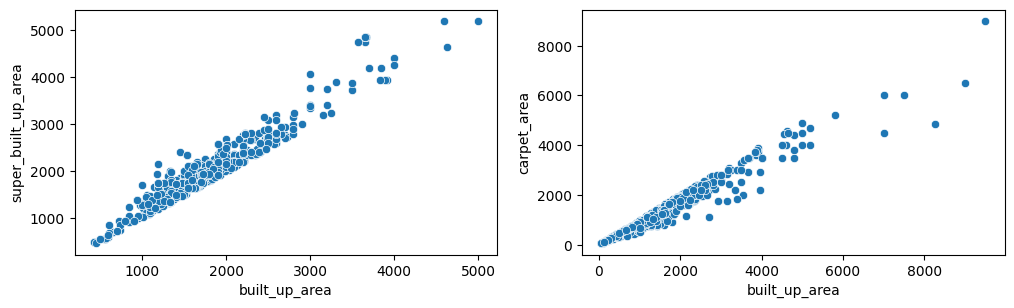

In [292]:
plt.figure(figsize=(12, 7))
plt.subplot(2, 2, 1)
sns.scatterplot(data, y = 'super_built_up_area', x = 'built_up_area')
plt.subplot(2, 2, 2)
sns.scatterplot(data, x = 'built_up_area', y = 'carpet_area')
plt.show()

- From here we can see that there is a very strong linear relationship between the built up area and super built up area 
- so we can use the super built up area to predict the built up area because this is a fixed quantity which is established by the government. 
- There is a very strong linear relationship between the built up area and carpet area and this is logical as well because the carpet area will be smaller than the built up area. 

In [293]:
all_present_df = data[~((data.super_built_up_area.isnull()) | (data.built_up_area.isnull()) | (data.carpet_area.isnull()))]

In [294]:
all_present_df.shape

(537, 24)

In [295]:
all_present_df.sample(3)

,property type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxary_score,area_bedroom_ratio
2205,flat,dlf new town heights,sector 90,1.21,6244.0,1938.0,Super Built up area 1930(179.3 sq.m.)Built Up area: 1929 sq.ft. (179.21 sq.m.)Carpet area: 1928 sq.ft. (179.12 sq.m.),3.0,3,3+,7.0,west,Relatively New,1930.0,1929.0,1928.0,0,1,0,1,0,0,127,646.00
2547,flat,ats marigold,sector 89,1.50,8499.0,1765.0,Super Built up area 1750(162.58 sq.m.)Built Up area: 1480 sq.ft. (137.5 sq.m.)Carpet area: 1450 sq.ft. (134.71 sq.m.),3.0,3,3,5.0,north,Under Construction,1750.0,1480.0,1450.0,0,0,0,0,0,0,96,588.33
970,flat,signature global park,sector 163,0.85,7863.0,1081.0,Super Built up area 1081(100.43 sq.m.)Built Up area: 1080 sq.ft. (100.34 sq.m.)Carpet area: 670 sq.ft. (62.25 sq.m.),3.0,2,2,4.0,east,New Property,1081.0,1080.0,670.0,0,0,0,0,0,0,23,360.33


In [296]:
super_to_built_up_area_ratio = (all_present_df['super_built_up_area']/ all_present_df['built_up_area']).median()
carpet_to_built_up_area_ratio = (all_present_df['carpet_area']/ all_present_df['built_up_area']).median()
print(f"Super built up area to built up area ratio is {super_to_built_up_area_ratio:.3f} and Carpet area to built up area ratio is {carpet_to_built_up_area_ratio:.3f}")

Super built up area to built up area ratio is 1.105 and Carpet area to built up area ratio is 0.900


- now extracting that rows in which the super built up area and carpet area is provided but not the built up area 

In [297]:
sbc_df = data[~(data['super_built_up_area'].isnull()) & (data['built_up_area'].isnull()) & ~(data['carpet_area'].isnull())]

In [298]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2), inplace= True)

/var/folders/_r/sndd4_s924d6z4fgsvt_v31r0000gn/T/ipykernel_15476/3089369129.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2), inplace= True)
/var/folders/_r/sndd4_s924d6z4fgsvt_v31r0000gn/T/ipykernel_15476/3089369129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [299]:
# updating the original data with these values 

data.update(sbc_df)

In [300]:
data.isnull().sum()

property type             0
society                   1
sector                    0
price                     0
price_per_sq_ft           0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                  2
facing                  255
agePossession             0
super_built_up_area    1874
built_up_area          1662
carpet_area            1842
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxary_score              0
area_bedroom_ratio        0
dtype: int64


- built up area has now significantly reduced from 2093 to 1662
- now extracting those rows in which super built up area is avaialble, built up area is null and carpet area is null

In [301]:
sbc_df = (
    data[~(data['super_built_up_area'].isnull()) & (data['built_up_area'].isnull()) & (data['carpet_area'].isnull())]    
)


In [302]:
sbc_df['built_up_area'].fillna(round(sbc_df['super_built_up_area']/1.105), inplace= True)

/var/folders/_r/sndd4_s924d6z4fgsvt_v31r0000gn/T/ipykernel_15476/3311252420.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(sbc_df['super_built_up_area']/1.105), inplace= True)
/var/folders/_r/sndd4_s924d6z4fgsvt_v31r0000gn/T/ipykernel_15476/3311252420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [303]:
data.update(sbc_df)

In [304]:
data['built_up_area'].isnull().sum()

np.int64(747)

- Now the missing values in the built up area has significantly reduced to 747 from 1662. 
- Now we will use the carpet area columnt to fill the missing values in the built up area 

In [305]:
# extracting those rows in which super built up area is not present but carpet area is avilable. 
# we will use the carpet area to fill the missing values for the built up area 

c_df = (
    data[(data['super_built_up_area'].isnull()) & (data['built_up_area'].isnull()) & ~(data['carpet_area'].isnull())]    
)


In [306]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9), inplace= True)

/var/folders/_r/sndd4_s924d6z4fgsvt_v31r0000gn/T/ipykernel_15476/785797264.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9), inplace= True)
/var/folders/_r/sndd4_s924d6z4fgsvt_v31r0000gn/T/ipykernel_15476/785797264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_

In [307]:
data.update(c_df)

In [308]:
data['built_up_area'].isnull().sum()

np.int64(0)

- Now there aren't any missing values in the built up area section

In [309]:
data.isnull().sum()

property type             0
society                   1
sector                    0
price                     0
price_per_sq_ft           0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                  2
facing                  255
agePossession             0
super_built_up_area    1874
built_up_area             0
carpet_area            1842
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxary_score              0
area_bedroom_ratio        0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

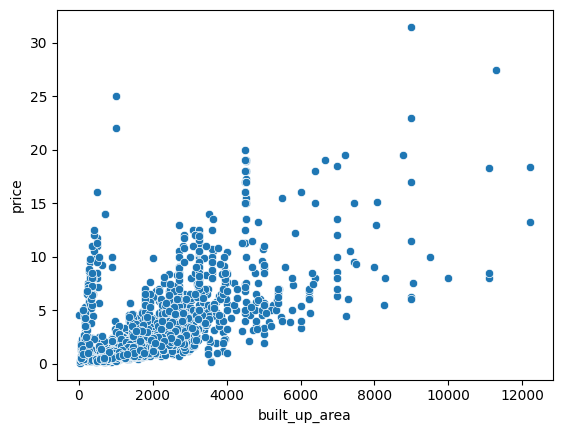

In [310]:
sns.scatterplot(data= data, x = 'built_up_area', y = 'price')

- In the scatter plto we can see there an anamoly, which is representing the price is increasing without increase in the area. so now, we will address that. 
- This anamoly is in the built up area less than 2000 square feet built up area where the price is greater than 2.5 crores. 

In [311]:
anamoly_df = data[(data['built_up_area'] < 2000) & (data['price'] > 2.5)][['price', 'area', 'built_up_area']]

In [312]:
anamoly_df.sample(5)

,price,area,built_up_area
704,4.20,2125.0,1946.0
2753,2.58,1458.0,1444.0
1394,9.85,3323.0,418.0
474,2.80,2048.0,1853.0
0,4.25,1620.0,200.0


- From here we can see that the price of the property is justfied with respect to the `area` but not with the `built_up_area`. 
- So now, we will replace the `built_up_area` for this anamoly with the `area` value 

In [313]:
anamoly_df['built_up_area'] = anamoly_df['area']

# updating the original dataframe with these values 

data.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

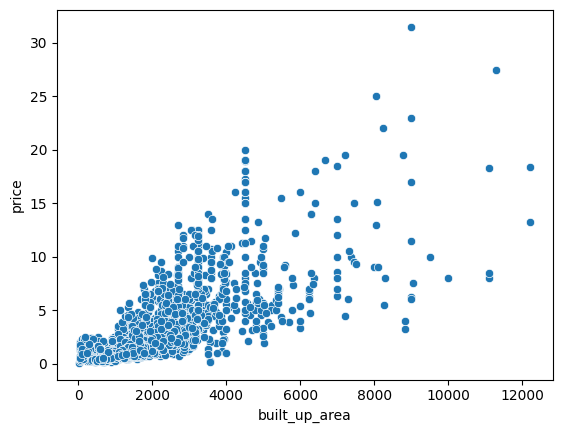

In [314]:
sns.scatterplot(data, x = 'built_up_area', y = 'price')

- Now the anamolies is removed and we can see that there is a linear relationship between the `built_up_area` and the `price`. 
- Now we will drop the `super_built_up_area`, `carpet_area`, `area`, `areaWithType` and `area_bedroom_ratio`

In [315]:
data.drop(columns= ['area', 'super_built_up_area', 'areaWithType', 'carpet_area', 'area_bedroom_ratio'], inplace= True)

In [316]:
data.sample(3)

,property type,society,sector,price,price_per_sq_ft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxary_score
2838,flat,sukhshanti apartment,sector 56,1.70,7727.0,3.0,3,3,4.0,south,Moderately Old,2200.0,1,0,0,0,0,0,49
915,flat,signature global solera,sector 107,0.29,5930.0,2.0,2,2,3.0,east,Relatively New,543.0,0,0,0,0,0,0,45
3311,flat,microtek greenburg,sector 86,1.65,8707.0,3.0,4,3,8.0,north-west,Relatively New,1715.0,0,1,0,0,0,0,124


In [317]:
data.isnull().sum()

property type        0
society              1
sector               0
price                0
price_per_sq_ft      0
bedRoom              0
bathroom             0
balcony              0
floorNum             2
facing             255
agePossession        0
built_up_area        0
study room           0
servant room         0
store room           0
pooja room           0
others               0
furnishing_type      0
luxary_score         0
dtype: int64

floorNum

In [318]:
(
    data[data 
    .floorNum 
    .isnull()]
)

,property type,society,sector,price,price_per_sq_ft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxary_score
997,flat,NaN,sector 78,0.60,3692.0,2.0,2,No,NaN,na,Under Construction,1625.0,0,0,0,0,0,0,0
2446,flat,experion heartsong,sector 8,1.08,6150.0,3.0,3,No,NaN,na,Under Construction,1758.0,0,0,0,0,0,0,0


filling these missing values with the median

In [319]:
data['floorNum'].fillna(2.0, inplace= True)

/var/folders/_r/sndd4_s924d6z4fgsvt_v31r0000gn/T/ipykernel_15476/33995332.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['floorNum'].fillna(2.0, inplace= True)


In [320]:
data.sample(3)

,property type,society,sector,price,price_per_sq_ft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxary_score
2244,flat,viridian the plaza 106,sector 106,0.46,6571.0,1.0,1,1,18.0,na,New Property,778.0,0,0,0,0,0,0,104
2386,flat,chd avenue,sector 71,1.00,6734.0,3.0,3,3+,3.0,north,Relatively New,1344.0,0,0,0,0,0,2,7
1128,flat,rof ananda,sector 95,0.38,5901.0,3.0,2,1,2.0,south-east,Relatively New,716.0,0,0,0,1,0,2,66


facing

In [321]:
data['facing'].isnull().sum()

np.int64(255)

In [322]:
data['facing'].value_counts()

facing
na            871
north-east    503
east          488
north         298
south         203
west          183
north-west    160
East          155
North-East    145
south-east    144
south-west    133
North          93
West           60
South-East     35
North-West     35
South          27
South-West     20
Name: count, dtype: int64

In [323]:
data['facing'].replace("na", np.nan, inplace= True)

/var/folders/_r/sndd4_s924d6z4fgsvt_v31r0000gn/T/ipykernel_15476/891733211.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['facing'].replace("na", np.nan, inplace= True)


In [324]:
data['facing'].isnull().sum()

np.int64(1126)

<Axes: ylabel='proportion'>

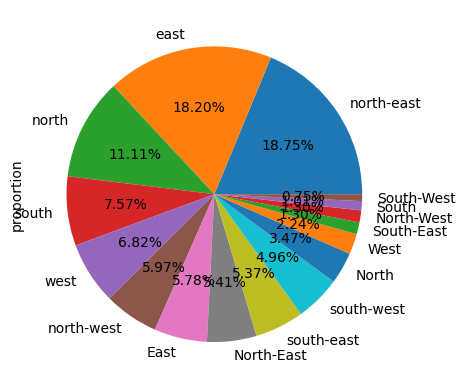

In [325]:
data['facing'].value_counts(normalize= True).plot(kind = 'pie', autopct = "%0.2f%%")

In [326]:
# dropping this column as there is 1/4th of the data which is missing

data.drop(columns= 'facing', inplace= True)

In [327]:
data.isnull().sum()

property type      0
society            1
sector             0
price              0
price_per_sq_ft    0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxary_score       0
dtype: int64

society

In [328]:
data.society.isnull().sum()

np.int64(1)

In [329]:
# dropping this single row 

data = data[~data['society'].isnull()]

In [330]:
data.shape

(3807, 18)

agePossession

In [331]:
data.agePossession.value_counts()

agePossession
Relatively New        1661
New Property           609
Moderately Old         582
undefined              343
Old Property           330
Under Construction     282
Name: count, dtype: int64

In [332]:
(
    data[data 
         .agePossession == 'undefined']
         .sample(4)
)

,property type,society,sector,price,price_per_sq_ft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxary_score
2700,flat,sare crescent parc,sector 92,0.95,5013.0,4.0,5,3+,13.0,undefined,1895.0,0,0,0,0,0,0,0
3155,house,independent,sector 48,0.82,3905.0,3.0,2,1,1.0,undefined,2333.0,0,0,0,0,0,0,0
583,flat,sare petioles,sector 92,1.30,6373.0,4.0,4,No,7.0,undefined,2040.0,0,0,0,0,0,0,0
1481,flat,signature global orchard avenue,sector 93,0.85,14238.0,2.0,2,No,10.0,undefined,597.0,0,0,0,0,0,0,0


- In our data we have observed that the age of the property is highly dependent on the property type and sector. 
- So we will perform statistical tests to verify this claim. 

In [333]:
ct = pd.crosstab(data['property type'], data['agePossession'])
rows, cols = ct.shape
rows, cols

(2, 6)

In [334]:
n = (
    ct 
    .sum()
    .sum()
)

In [335]:
def cramers_v(data, var1, var2):
    import scipy.stats
    ct = pd.crosstab(
        data.loc[:, var1],
        data.loc[:, var2]
    )
    r, c = ct.shape
    n = ct.sum().sum()
    chi2, _, _, _ = scipy.stats.chi2_contingency(ct)
    phi2 = chi2/ n 


    return np.sqrt(phi2 / min(r -1, c -1))

def cramerV_heatmap(data, figsize = (12, 6), cmap = "Blues"):
    cols = data.select_dtypes(include = "O").columns.to_list()

    matrix = (
        pd
        .DataFrame(data = np.ones((len(cols), len(cols))))
        .set_axis(cols, axis = 0)
        .set_axis(cols, axis = 1)
    )

    for col1 in cols:
        for col2 in cols:
            if col1 != col2:
                matrix.loc[col1, col2] = cramers_v(data, col1, col2)

    mask = np.zeros_like(matrix, dtype = bool)
    mask[np.triu_indices_from(mask)] = True 

    fig, ax = plt.subplots(figsize = figsize)

    hm = sns.heatmap(
        matrix, 
        cmap = cmap, 
        annot = True, 
        fmt = ".2f", 
        square = True, 
        linewidths = 1.5, 
        
    )

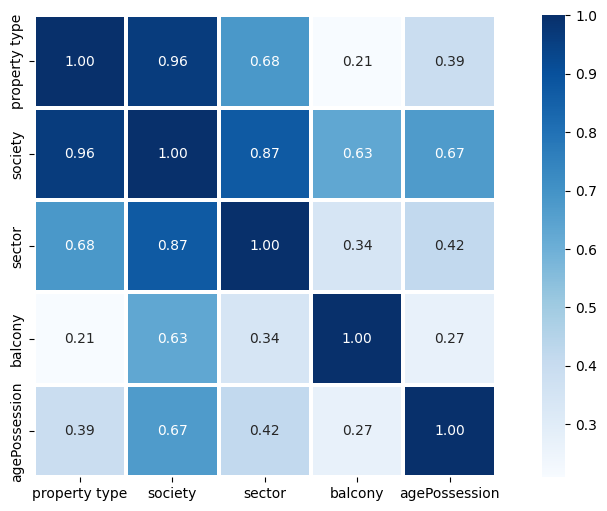

In [336]:
cramerV_heatmap(data)

- `agePossession` is highly dependent on the `society`, `sector` and `property_type` 
- we will use the sector to replace the undefined values in the `agePossession` column as the cardinality is less in comparison to `society` also using `sector` for impution will add some value to our data 

In [337]:
data.sample(3)

,property type,society,sector,price,price_per_sq_ft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxary_score
1904,flat,signature global city 92,sector 92,0.99,9074.0,3.0,2,3,1.0,Under Construction,1091.0,0,0,0,0,0,0,24
150,house,independent,sector 9,3.40,12938.0,9.0,9,3,3.0,Moderately Old,2628.0,0,0,0,0,0,2,61
930,house,independent,sector 45,10.00,30864.0,6.0,6,3+,4.0,Moderately Old,3240.0,1,1,1,1,0,2,70


In [338]:
data[data['agePossession'] == 'undefined'].shape

(343, 18)

In [339]:
def mode_based_imputation(row):
    if row['agePossession'] == 'undefined':
        mode_value = data[(data['sector'] == row['sector']) & (data['property type'] == row['property type'])]['agePossession'].mode()

        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan 
    else:
        return row['agePossession']

In [340]:
data['agePossession'] = data.apply(mode_based_imputation, axis = 1)

In [341]:
data['agePossession'].value_counts()

agePossession
Relatively New        1786
New Property           652
Moderately Old         634
Old Property           375
Under Construction     304
undefined               56
Name: count, dtype: int64

In [342]:
def mode_based_imputation1(row):
    if row['agePossession'] == 'undefined':
        mode_value = data[(data['sector'] == row['sector'])]['agePossession'].mode()

        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan 
    else:
        return row['agePossession']

In [343]:
data['agePossession'] = data.apply(mode_based_imputation1, axis = 1)
data['agePossession'].value_counts()

agePossession
Relatively New        1794
New Property           653
Moderately Old         641
Old Property           375
Under Construction     304
undefined               40
Name: count, dtype: int64

In [344]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'undefined':
        mode_value = data[(data['property type'] == row['property type'])]['agePossession'].mode()

        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan 
    else:
        return row['agePossession']

In [345]:
data['agePossession'] = data.apply(mode_based_imputation2, axis = 1)
data['agePossession'].value_counts()

agePossession
Relatively New        1799
Moderately Old         676
New Property           653
Old Property           375
Under Construction     304
Name: count, dtype: int64

In [346]:
data.isnull().sum()

property type      0
society            0
sector             0
price              0
price_per_sq_ft    0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxary_score       0
dtype: int64

- Now we don't have any missing values in our column

In [347]:
dir_path = "/Users/abhisheksaurav/Desktop/real_estate_project/Data Collection/Data/City/chandigarh/cleaned_data"
file_name = "gurgaon_properties_missing_values_imputation"
data.to_csv("{}/{}.csv".format(dir_path, file_name), index = False)